## Exploratory Data Analysis

### Abstract

This notebook loads in the data supplied by kaggle. Features with null value were dropped (per rules of contest). Features with non numeric values were converted to numeric using dummy variables and ordinal scales where appropriate. Additionally features with distributions that lacked variability were droppped as a form of feature selection. 

### Load Data & Import Libraries

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('./datasets/train.csv')
holdout = pd.read_csv('./datasets/test.csv')

### Data Cleaning
##### Drop columns that contain null values

In [35]:
# drop columns with null values per rules of competition
df.dropna(axis=1,inplace = True)

##### Converting ordnial columns
Below function converts columns that are odrinal to a numeric scale to be used in regression modeling. The first function 

In [36]:
def ordinal_function(dataframe):
    # creating individual dictionaires of vlaues to replace
    elec_key ={'SBrkr':4,'FuseA':3,'FuseF':2,'FuseP':1,'Mix':0}
    pave_key = {'Y':2,'P':1,'N':0}
    # Kitchen Qual & Heatin QC use the same scale
    nondescript_key ={'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}  
     
    # add column titles to dictionaires
    dictionary_list = {
        'Electrical': elec_key,
        'Paved Drive': pave_key,
        'Kitchen Qual': nondescript_key,
        'Heating QC': nondescript_key
    }
    
    # replace data
    for col in dictionary_list:
        dataframe[col] = dataframe[col].replace(dictionary_list[col])
    return dataframe

In [37]:
df = ordinal_function(df)

In [38]:
holdout = ordinal_function(holdout)

##### Initial Exploratory Data Analyiss
Below cells explore distribution among features as a form of feature selection

In [39]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,...,44,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,11492,Pave,IR1,Lvl,AllPub,CulDSac,...,74,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,7922,Pave,Reg,Lvl,AllPub,Inside,...,52,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,9802,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,14235,Pave,IR1,Lvl,AllPub,Inside,...,59,0,0,0,0,0,3,2010,WD,138500


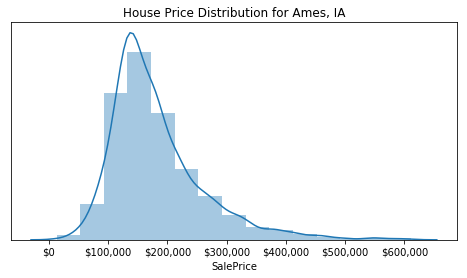

In [40]:
# target dist plot
plt.figure(figsize=(8,4))
sns.distplot(df['SalePrice'],bins =15,)
plt.yticks([])
plt.xticks(ticks = [0,100000,200000,300000,400000,500000,600000],
           labels =['$0', '$100,000', '$200,000', '$300,000', '$400,000', '$500,000', '$600,000'])
plt.title('House Price Distribution for Ames, IA')
plt.savefig('./images/house_price_distribution.png');

In [43]:
df['Utilities'].value_counts()

AllPub    2049
NoSewr       1
NoSeWa       1
Name: Utilities, dtype: int64

A function to drop columns that lack variablity, the rule I chose was if an outcome for a specific feature contained more than 50% of the samples I would not include that column

In [44]:
def concetration_col_drop(dataframe):
    for col in dataframe.columns:
        if max(df[col].value_counts()) >= 1_000:
            dataframe.drop(columns = [col], inplace =True)
    return dataframe

In [45]:
df = concetration_col_drop(df)

In [46]:
holdout = concetration_col_drop(df)

### Create Dummy Columns
Below function creates dummy variables from columns that could not be converted to ordinal and returns the new dataframe

In [49]:
def dummy_function (dataframe):
    # list of colmuns to be dummied
    dummy_list = [
        'Foundation',
        'Exterior 1st',
        'Exterior 2nd',
        'Neighborhood',
    ]
    
    # creat dummy columns
    dataframe = pd.get_dummies(dataframe,
                               columns = dummy_list,
                               drop_first=True
                              )
    return dataframe

In [50]:
df = dummy_function(df)

In [51]:
holdout = dummy_function(holdout)

Export preprocessed dataframes to be used for modeling

In [52]:
df.to_csv('./datasets/preprocessed_data.csv', index = False)

In [53]:
holdout.to_csv('./datasets/preprocessed_holdout.csv', index = False)